In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
from pandas import DataFrame, Series

plt.style.use('seaborn')
sns.set(font_scale=2.5) 


In [29]:
df_train = pd.read_csv('../실습자료/4장/train.csv')
df_test = pd.read_csv('../실습자료/4장/test.csv')

In [30]:
#학습데이터, 테스트데이터의 차원 조회 (테스트데이터에는 'survived' 칼럼이 없음)
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [31]:
columns=df_train.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [35]:
df_train['Survived'].value_counts() #target value로 사용할 컬럼인 'Survived'의 클래스 별 데이터 수

0    549
1    342
Name: Survived, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


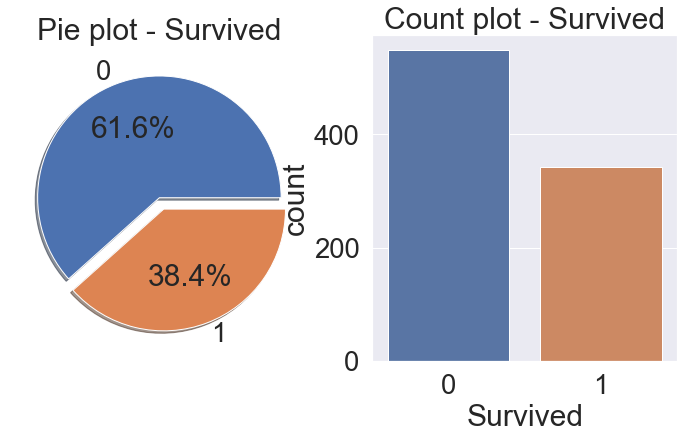

In [36]:
#'Survived' 컬럼 시각화
f, ax = plt.subplots(1, 2, figsize =(12, 6))
df_train["Survived"].value_counts().plot.pie(explode=[0,0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel('')
sns.countplot("Survived", data=df_train, ax=ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

In [37]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [40]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [41]:
#문자열로 이루어진 'sex' 컬럼은 숫자로 매핑
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

#'Age', 'Fare' 컬럼에 대하여 평균으로부터 3시그마 안에 포함되지 않는 값들은 이상치로 판단하여 모두 제거
age_mean = train['Age'].mean()
age_std = train['Age'].std()
indexNames = train[train['Age'] < age_mean - 3*age_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Age'] > age_mean + 3*age_std].index
train.drop(indexNames , inplace=True)
fare_mean = train['Fare'].mean()
fare_std = train['Fare'].std()
indexNames = train[train['Fare'] < fare_mean - 3*fare_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Fare'] > fare_mean + 3*fare_std].index
train.drop(indexNames , inplace=True)

In [42]:
#이번 실습에서 학습에 사용하지 않을 컬럼 제거
train = df_train.drop(['Cabin', 'Embarked', 'Name', 'Ticket', 'PassengerId'],axis=1)
test = df_test.drop(['Cabin', 'Embarked', 'Name', 'Ticket'],axis=1)

#결측치를 평균값으로 대체
train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Sex")["Fare"].transform("median"), inplace=True)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
from pandas import DataFrame, Series

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
df_train = pd.read_csv('../실습자료/4장/train.csv')
df_test = pd.read_csv('../실습자료/4장/test.csv')
train = df_train.drop(['Cabin', 'Embarked', 'Name', 'Ticket', 'PassengerId'],axis=1)
test = df_test.drop(['Cabin', 'Embarked', 'Name', 'Ticket'],axis=1)
train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Sex")["Fare"].transform("median"), inplace=True)
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)
age_mean = train['Age'].mean()
age_std = train['Age'].std()
indexNames = train[train['Age'] < age_mean - 3*age_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Age'] > age_mean + 3*age_std].index
train.drop(indexNames , inplace=True)
fare_mean = train['Fare'].mean()
fare_std = train['Fare'].std()
indexNames = train[train['Fare'] < fare_mean - 3*fare_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Fare'] > fare_mean + 3*fare_std].index
train.drop(indexNames , inplace=True)
#'4장_Titanic dataset 탐색 및 전처리.ipynb'에서 전처리 코드만 실행하는 부분

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train = train.drop('Survived', axis=1).values
target_label = train['Survived'].values
X_test = test.values

In [45]:
X_train.shape, X_test.shape

((864, 6), (418, 7))

In [46]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2020)
y_tr.shape, y_vld.shape

((691,), (173,))

In [47]:
model = LogisticRegression()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [48]:
prediction

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [49]:
print('Number of people: {} \naccuracy: {:.2f}% '.format(y_vld.shape[0], 100 * accuracy_score(y_vld,prediction)))

Number of people: 173 
accuracy: 78.03% 


In [50]:
confusion_matrix(y_vld,prediction)

array([[94, 24],
       [14, 41]], dtype=int64)

In [51]:
print('Precision: {:.2f}% \nRecall: {:.2f}% \nF1-score: {:.2f}% '.format(100*precision_score(y_vld,prediction),
                                                                         100*recall_score(y_vld,prediction),100*f1_score(y_vld,prediction)))

Precision: 63.08% 
Recall: 74.55% 
F1-score: 68.33% 


In [52]:
#cut off 조절에 따른 모델의 성능을 평가해 보기 위하여 cut off 값 생성 및 각각의 성능 지표 도출
#cut off 값은 다양하게 선택 가능.
list = []
for i in np.linspace(0,1,100):
    pred = model.predict_proba(X_vld)[:,1] > i
    cf_mtx = confusion_matrix(y_vld, pred)
    acc = accuracy_score(y_vld, pred)
    tpr = cf_mtx[0,0] / cf_mtx[0].sum()
    fpr = cf_mtx[1,0] / cf_mtx[1].sum()
    f1 = f1_score(y_vld, pred)
    list.append([i, acc, f1, tpr, fpr])

cut_off = DataFrame(list)
cut_off.columns = ["CUTOFF", "ACC", "F1", "TPR", "FPR"]
cut_off

,CUTOFF,ACC,F1,TPR,FPR
0,0.000000,0.317919,0.482456,0.000000,0.000000
1,0.010101,0.323699,0.484581,0.008475,0.000000
2,0.020202,0.323699,0.484581,0.008475,0.000000
3,0.030303,0.329480,0.486726,0.016949,0.000000
4,0.040404,0.329480,0.486726,0.016949,0.000000
...,...,...,...,...,...
95,0.959596,0.687861,0.100000,0.983051,0.945455
96,0.969697,0.687861,0.100000,0.983051,0.945455
97,0.979798,0.676301,0.034483,0.983051,0.981818
98,0.989899,0.676301,0.000000,0.991525,1.000000


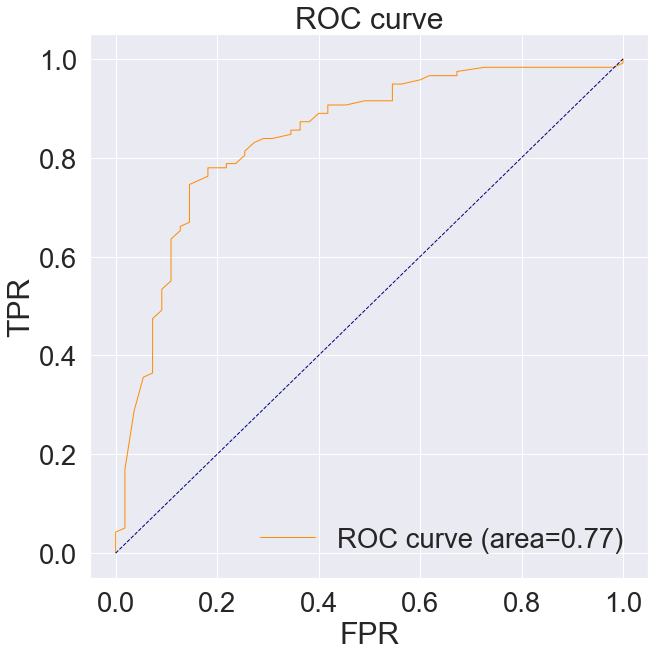

In [53]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_vld, prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(cut_off["FPR"],cut_off["TPR"], color="darkorange", lw=1, label="ROC curve (area=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

In [54]:
cut_off[cut_off["ACC"] == cut_off["ACC"].max()] #accuracy가 최대인 값

,CUTOFF,ACC,F1,TPR,FPR
70,0.707071,0.803468,0.653061,0.90678,0.418182


In [55]:
cut_off_ACC_MAX = cut_off[cut_off["ACC"] == cut_off["ACC"].max()]["CUTOFF"][70]
cut_off_ACC_MAX

0.7070707070707072

In [56]:
pred_ACC_MAX = model.predict_proba(X_vld)[:,1] > cut_off_ACC_MAX

In [57]:
confusion_matrix(y_vld,pred_ACC_MAX)

array([[107,  11],
       [ 23,  32]], dtype=int64)

In [58]:
cut_off[cut_off["F1"] == cut_off["F1"].max()] #F1-score가 최대인 값

,CUTOFF,ACC,F1,TPR,FPR
45,0.454545,0.791908,0.714286,0.779661,0.181818


In [59]:
cut_off_F1_MAX = cut_off[cut_off["F1"] == cut_off["F1"].max()]["CUTOFF"][45]
cut_off_F1_MAX

0.4545454545454546

In [60]:
pred_F1_MAX = model.predict_proba(X_vld)[:,1] > cut_off_F1_MAX

In [61]:
confusion_matrix(y_vld,pred_F1_MAX)

array([[92, 26],
       [10, 45]], dtype=int64)